# Here we show that the muon weighted field average gets the same results when calculated in the grid method and the moments method

## 1) The Moments Method
### Basic setup

In [1]:
import sys
import numpy as np
import pandas as pd

basedir='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/'

#import the relevant field moments functions
path = basedir + 'field_info'
sys.path.insert(0,path)
from format_field import field_team_to_standard_moments as ftts
from field_grid import *

#import the relevant synthesis tools
path = basedir + 'synthesis'
sys.path.insert(0,path)
from spacial_tools import moments_method as mm

path= basedir + 'tracker_info'
sys.path.append(path)
from beam_moments import *
from transform_beam import *
from beam_moments import get_normalized_distribution_moments as gndm

### Get the field moments
Load the field/odb pickle file for the 60 hour dataset

In [2]:
# path = basedir + 'synthesis/data/60H_field_ctag_dqm.pkl'

path = basedir + 'field_info/data/run1/all_multipoles/run1_v00/'
path = path + '60Hr_vals_uncertainties_3956-3997.pkl'
df = pd.read_pickle(path)



get the ctag weighted field moments and convert to standard representation

In [3]:
total_ctags = df["ctags"].sum()
b = [
    (df["D"]*df["ctags"]).sum()/total_ctags,
    (df["NQ"]*df["ctags"]).sum()/total_ctags,
    (df["SQ"]*df["ctags"]).sum()/total_ctags,
    (df["NS"]*df["ctags"]).sum()/total_ctags,
    (df["SS"]*df["ctags"]).sum()/total_ctags,
    (df["NO"]*df["ctags"]).sum()/total_ctags,
    (df["NO"]*df["ctags"]).sum()/total_ctags,
    (df["ND"]*df["ctags"]).sum()/total_ctags,
    (df["ND"]*df["ctags"]).sum()/total_ctags]
c,s = ftts(b)


### Get the beam moments

get the dataframe representing tracker 12

In [4]:
df_tracker = get_df_tracker()
mask12 = (df_tracker["Station"] == 'station12')
df_12 = df_tracker[mask12].copy()
df_12['counts_norm'] = df_12['counts']/df_12['counts'].sum()
df_12.head()

,index,radial,vertical,counts,Station,counts_norm
0,2,-59.0,-59.0,0.0,station12,0.0
1,3,-59.0,-57.0,0.0,station12,0.0
2,4,-59.0,-55.0,0.0,station12,0.0
3,5,-59.0,-53.0,0.0,station12,0.0
4,6,-59.0,-51.0,0.0,station12,0.0


get the normalized moments beam moments

In [5]:
x = df_12['radial']
y = df_12['vertical']
weights = df_12['counts']
N = 5
I_norm, J_norm = gndm(N,x,y,weights)

### Display all the moments and their contributions

In [6]:
print(c,'\n')
print(s,'\n')
print(I_norm,'\n')
print(J_norm,'\n')
print(c*I_norm,'\n')
print(s*J_norm,'\n')

[ 8.37764260e+02 -1.00577080e-01 -1.20467157e+00  8.03280584e-03
  6.91568658e-02] 

[0.         0.25299367 0.33800526 0.00803281 0.06915687] 

[1.         0.15097058 0.10640059 0.00660348 0.00450191] 

[ 0.00000000e+00 -1.28906937e-04  5.62725260e-04  4.27693398e-05
 -8.03948742e-05] 

[ 8.37764260e+02 -1.51841800e-02 -1.28177768e-01  5.30444858e-05
  3.11337965e-04] 

[ 0.00000000e+00 -3.26126391e-05  1.90204098e-04  3.43557802e-07
 -5.55985753e-06] 



### and get the "moments method" result

In [7]:
moments_result = mm(c,s,I_norm,J_norm)
moments_result

837.6214149088376

## 2) The Grid Method
### convert the bloch field moments to a field grid

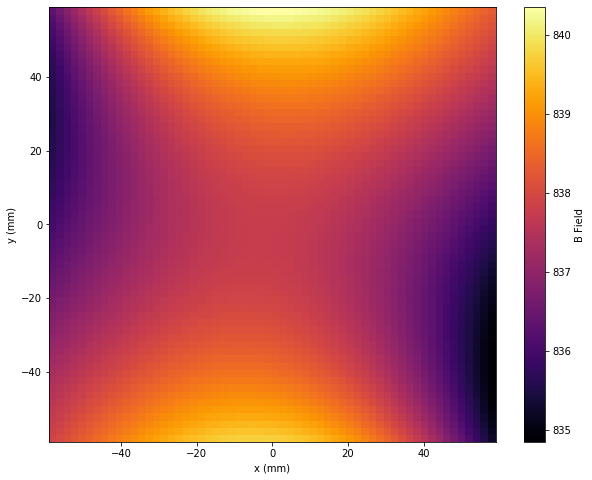

In [8]:
df_field_grid = get_field_grid(b)
fig = plot_field(df_field_grid)
fig

### and having left the beam-grid in it's native form, get the grid result

In [9]:
grid_result = (df_12['counts']*df_field_grid['B']).sum()/(df_12['counts'].sum())
grid_result

837.6214149088376

In [10]:
grid_result - moments_result

0.0

__we see that the difference in the two methods is tiny__



# 3) do the same thing for the error 

### first compute the varience of each moment
### do NOT treat this in the usual way were you square the weighting factors that were used in the calculation of the central values

In [21]:

total_ctags = (df["ctags"].sum())
norm = total_ctags

# to get eb, first get the varience 
df["varD"] = df["eD"]**2
df["varNQ"] = df["eNQ"]**2
df["varSQ"] = df["eSQ"]**2
df["varNS"] = df["eNS"]**2
df["varSS"] = df["eSS"]**2
df["varNO"] = df["eNO"]**2
df["varSO"] = df["eSO"]**2
df["varND"] = df["eND"]**2
df["varSD"] = df["eSD"]**2
var_b = [
    (df["varD"]*df["ctags"]).sum()/norm,
    (df["varNQ"]*df["ctags"]).sum()/norm,
    (df["varSQ"]*df["ctags"]).sum()/norm,
    (df["varNS"]*df["ctags"]).sum()/norm,
    (df["varSS"]*df["ctags"]).sum()/norm,
    (df["varNO"]*df["ctags"]).sum()/norm,
    (df["varNO"]*df["ctags"]).sum()/norm,
    (df["varND"]*df["ctags"]).sum()/norm,
    (df["varND"]*df["ctags"]).sum()/norm] 

var_c,var_s = ftts(var_b)
eb = [np.sqrt(v) for v in var_b]
eb

[0.07566100058582945,
 0.061788375543755415,
 0.06020361353694255,
 0.06281243995097079,
 0.05256159716032307,
 0.04394487400195354,
 0.04394487400195354,
 0.04393702866899798,
 0.04393702866899798]

### moments method

In [23]:
#can choose to compute in a variety of ways
N1 = (I_norm**1)
N2 = (J_norm**1)

var_moments_result = mm(var_c,var_s,N1,N2)
error_from_var_mm = np.sqrt(var_moments_result)
error_from_var_mm

0.08211707549665694

In [40]:
print(np.sqrt(var_c))
print('--')
print(N1)
print('--')
print(var_c*N1)
print('--')
print('--')
print(np.sqrt(var_c))
print(np.sqrt(var_c)*N1)

[0.075661   0.06178838 0.06281244 0.04394487 0.04393703]
--
[1.         0.15097058 0.10640059 0.00660348 0.00450191]
--
[5.72458701e-03 5.76375982e-04 4.19793174e-04 1.27523265e-05
 8.69076779e-06]
--
--
[0.075661   0.06178838 0.06281244 0.04394487 0.04393703]
[0.075661   0.00932823 0.00668328 0.00029019 0.0001978 ]


In [41]:
print(np.sqrt(var_s))
print('--')
print(N2)
print('--')
print(var_s*N2)
print('--')
print('--')
print(np.sqrt(var_s))
print(np.sqrt(var_s)*N2)

[0.         0.06020361 0.0525616  0.04394487 0.04393703]
--
[ 0.00000000e+00 -1.28906937e-04  5.62725260e-04  4.27693398e-05
 -8.03948742e-05]
--
[ 0.00000000e+00 -4.67219979e-07  1.55465317e-06  8.25940939e-08
 -1.55199289e-07]
--
--
[0.         0.06020361 0.0525616  0.04394487 0.04393703]
[ 0.00000000e+00 -7.76066339e-06  2.95777384e-05  1.87949325e-06
 -3.53231189e-06]


### Grid error method 0
just do the exact same thing as in the grid method

In [33]:
# get the grid that represents the varience at each point
var_df_field_grid = get_field_grid(var_b)


#get the total counts
total_counts = df_12['counts'].sum()

var_grid_result = ((df_12['counts'])*var_df_field_grid['B']).sum()/(total_counts)
error_from_var_gr = np.sqrt(var_grid_result)
error_from_var_gr

0.08211707549665694

In [34]:
error_from_var_mm - error_from_var_gr

0.0

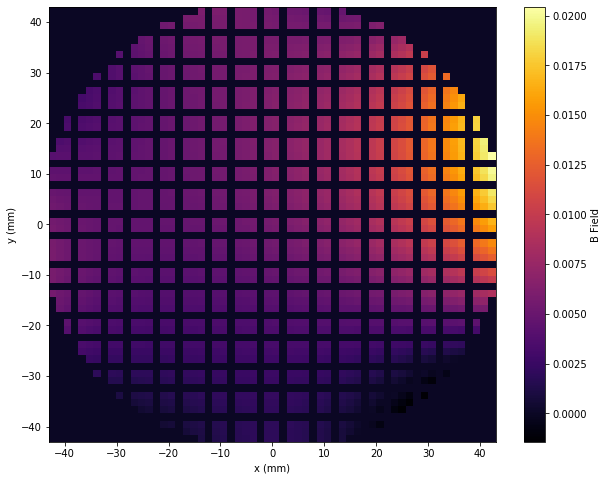

In [37]:
# mask  = var_df_field_grid['x']**2 + var_df_field_grid['y']**2 < 45**2
# var_df_field_grid = var_df_field_grid[mask]
fig = plot_field(var_df_field_grid)
fig

### Grid error method 1

In [26]:
# get the grid that represents the varience at each point
var_df_field_grid = get_field_grid(eb)
var_df_field_grid['B'] = var_df_field_grid['B']**2

#square the beam weighting factor at each point in the grid
df_12['counts-sq'] = df_12['counts']**2

#get the total counts
total_counts = df_12['counts'].sum()

var_grid_result = ((df_12['counts-sq'])*var_df_field_grid['B']).sum()/(total_counts**2)
error_from_var_gr = np.sqrt(var_grid_result)
error_from_var_gr

0.003873778054651493

In [27]:
error_from_var_mm - error_from_var_gr

0.07824329744200545

### Grid error method 2

In [31]:
# get the grid that represents the varience at each point
var_df_field_grid = get_field_grid(eb)
var_df_field_grid['B'] = var_df_field_grid['B']**2

#get the total counts
total_counts = df_12['counts'].sum()

var_grid_result = ((df_12['counts'])*var_df_field_grid['B']).sum()/(total_counts)
error_from_var_gr = np.sqrt(var_grid_result)
error_from_var_gr

0.10500420118749791

In [32]:
error_from_var_mm - error_from_var_gr

-0.022887125690840976

### Grid error method 3

In [29]:
# get the grid that represents the varience at each point
var_df_field_grid = get_field_grid(var_b)

#square the beam weighting factor at each point in the grid
df_12['counts-sq'] = df_12['counts']**2

#get the total counts
total_counts = df_12['counts'].sum()

var_grid_result = ((df_12['counts-sq'])*var_df_field_grid['B']).sum()/(total_counts**2)
error_from_var_gr = np.sqrt(var_grid_result)
error_from_var_gr

0.0030963099064514766

In [30]:
error_from_var_mm - error_from_var_gr

0.07902076559020546

In [18]:
print('--field--')
print('normal: \n')
print(np.sqrt(var_c))
print('skew: \n')
print(var_s)

--field--
normal: 

[0.075661   0.06178838 0.06281244 0.04394487 0.04393703]
skew: 

[0.         0.00362448 0.00276272 0.00193115 0.00193046]


In [19]:
print('--beam--')
print('normal: \n')
print(np.sqrt(I_norm))
print('skew: \n')
print(J_norm)

--beam--
normal: 

[1.         0.38854933 0.32619104 0.08126181 0.06709627]
skew: 

[ 0.00000000e+00 -1.28906937e-04  5.62725260e-04  4.27693398e-05
 -8.03948742e-05]


In [20]:
print('--total--')
print('normal: \n')
print(np.sqrt(var_c*I_norm))
print('skew: \n')
print(var_s*J_norm)

--total--
normal: 

[0.075661   0.02400783 0.02048885 0.00357104 0.00294801]
skew: 

[ 0.00000000e+00 -4.67219979e-07  1.55465317e-06  8.25940939e-08
 -1.55199289e-07]


In [21]:
#dispaly the varience grid that was used


# an alternative, and i think wrong, approach

In [22]:
#now get the total error on each moment
eb = [np.sqrt(v) for v in var_b]
ec,es = ftts(eb)

In [23]:
#get the field-originating error in the moments method
e_moments_result = mm(ec,es,I_norm,J_norm)
e_moments_result

0.0921806621725356

In [24]:
#get the field-originating error in the grid method
e_df_field_grid = get_field_grid(eb)
e_grid_result = (df_12['counts']*e_df_field_grid['B']).sum()/(df_12['counts'].sum())
e_grid_result

0.09218066217253558

In [25]:
e_grid_result - e_moments_result

-1.3877787807814457e-17

once again, we get the same result from both methods. they are the same